<a href="https://colab.research.google.com/github/LeeSangMin96/movie_recommend/blob/main/final_contents_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from ast import literal_eval
import re

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import font_manager
%matplotlib inline

#font_fname='C://Users//diasy//AppData//Local//Microsoft//Windows//Fonts//NanumBarunGothic.ttf'

#font_family=font_manager.FontProperties(fname=font_fname).get_name()

#plt.rcParams["font.family"] = font_family

my_wc = WordCloud(
    max_font_size=80,
    background_color ='white',
    font_path='BMHANNAPro.ttf'
    )
#font_path='C:/Users/diasy/AppData/Local/Microsoft/Windows/Fonts/DejaVuSans.ttf'
# font_path = "C:/Users/diasy/AppData/Local/Microsoft/Windows/Fonts/NanumBarunGothic.ttf"
# 'C:/Users/diasy/AppData/Local/Microsoft/Windows/Fonts/Recipekorea 레코체 FONT.ttf'

In [ ]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 300)

movies = pd.read_csv('data (1).csv')

print(movies)
#encoding='euc-kr'

                       title                       genre   director
0                     시네마 천국           ['드라마', '멜로/로맨스']  쥬세페 토르나토레
1                   빽 투 더 퓨쳐               ['SF', '코미디']   로버트 저메키스
2                 빽 투 더 퓨쳐 2               ['SF', '코미디']   로버트 저메키스
3                 빽 투 더 퓨쳐 3  ['SF', '서부', '판타지', '코미디']   로버트 저메키스
4       스타워즈 에피소드 4 - 새로운 희망   ['SF', '모험', '액션', '판타지']     조지 루카스
...                      ...                         ...        ...
178469      스와핑 : 두 부부의 이혼여행                      ['에로']        이대길
178470             불사조, 비상하다                   ['다큐멘터리']     이안 보노트
178471            우리, 자영(가제)                         NaN        정가영
178472                  식물생활                     ['드라마']        백승화
178473                가슴큰자매들            ['에로', '멜로/로맨스']        이정석

[178474 rows x 3 columns]


In [ ]:
movies=movies.dropna()
print(movies.shape)

(130062, 3)


In [ ]:
movies = movies.loc[:, ['title','genre', 'director']]

movies['genre'] = movies['genre'].apply(literal_eval)
movies['director'] = movies['director'].apply(literal_eval)

movies['genre'] = movies['genre'].apply(lambda x : ' '.join(x))
movies['director'] = movies['director'].apply(lambda x : ' '.join(x))

SyntaxError: ignored

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(ngram_range=(1,2))
tfidf_matrix = tfidf_vec.fit_transform(movies['genre'])
# tfidf_matrix = tfidf_vec.fit_transform(movies['director'])

print(tfidf_matrix.shape) #264 125

(264, 125)


In [ ]:
from sklearn.metrics. pairwise import cosine_similarity

genres_similarity = cosine_similarity(tfidf_matrix, tfidf_matrix) 
print(genres_similarity)
similar_index = np.argsort(-genres_similarity)
print(similar_index)

[[1.         0.16444557 0.         ... 0.         1.         0.        ]
 [0.16444557 1.         0.         ... 0.         0.16444557 0.06553181]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [1.         0.16444557 0.         ... 0.         1.         0.        ]
 [0.         0.06553181 0.         ... 0.         0.         1.        ]]
[[  0 262 129 ... 135 121 263]
 [  1  10 120 ... 155  97  63]
 [133 167  93 ...  98  67 263]
 ...
 [261  99  82 ... 101  65 263]
 [  0 262 129 ... 135 121 263]
 [263 143 141 ... 103  69 131]]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(ngram_range=(1, 2))
count_matrix = count_vec.fit_transform(movies['genre'])

In [ ]:
from collections import Counter

input_movie = input()
input_movie = re.sub('\W+', '', input_movie)

movie_index = -1

for i in movies['title']:                       #전부 일치하는게 아닌.. 조금이라도 일치하면 그 영화 반환
    movie_index+=1
    i = re.sub('\W+', '', i)
    if input_movie in i:
        break

similar_movies = similar_index[movie_index, :int(30)]
# print(similar_movies)
similar_movies_index = similar_movies.reshape(-1)
# print(similar_movies_index)
print(movies.iloc[similar_movies_index])
type(movies.iloc[similar_movies_index])
#wordtext=movies.iloc[similar_movies_index]['title']
count = Counter(movies.iloc[similar_movies_index, 0])
print(count)

골뱅이
                title genre                director
51           낚시 바보 일지   코미디                쿠리야마 토미오
180     위드 프렌즈 라이크 디즈   코미디              필립 프랭크 메시나
115              @골뱅이   코미디           신정관  김용재  이창재
116             허니 허니   코미디                김용재  안범진
212           퍼펙트 크라임   코미디           알렉스 드 라 이글레시아
126             덕 패밀리   코미디  피터 볼드윈  로드 다니엘  짐 드레이크
223              프리저번   코미디                  멜리사 바린
52         낚시 바보 일지 2   코미디                쿠리야마 토미오
53         낚시 바보 일지 3   코미디                쿠리야마 토미오
54         낚시 바보 일지 4   코미디                쿠리야마 토미오
55         낚시 바보 일지 5   코미디                쿠리야마 토미오
56         낚시 바보 일지 6   코미디                쿠리야마 토미오
135               미라클   코미디                     이민호
57         낚시 바보 일지 7   코미디                쿠리야마 토미오
59         낚시 바보 일지 9   코미디                쿠리야마 토미오
60        낚시 바보 일지 10   코미디                쿠리야마 토미오
61        낚시 바보 일지 11   코미디                모토키 가츠히데
62        낚시 바보 일지 12   코미디                모토키 가츠히데
63      

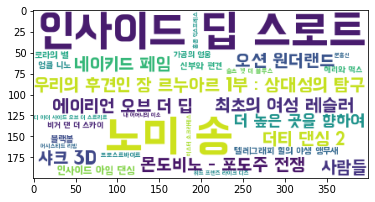

In [ ]:
고@#print(wordtext)
#wordcloud=WordCloud().generate_from_frequencies(wordtext)
plt.imshow(my_wc.generate_from_frequencies(count))
plt.show()

In [ ]:
from PIL import Image

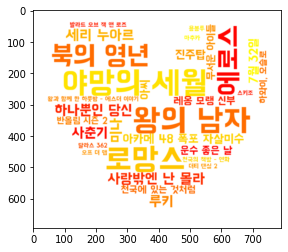

In [ ]:
image_mask=np.array(Image.open("heart_image.png"))
my_wc=  WordCloud(
  max_font_size=100,
  background_color='white',
  mask=image_mask,
  colormap='autumn',
  font_path='BMHANNAPro.ttf')

plt.imshow(my_wc.generate_from_frequencies(count),interpolation='bilinear')
plt.show()